In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def func(x, a0, a1, a2, a3, a4):
    func = np.polynomial.chebyshev.chebval(x, [a0, a1, a2, a3, a4])
    return func

In [4]:
def crit(params, *args):
    a0, a1, a2, a3, a4 = params
    data_moments, ages = args
    model_moments = func(ages, a0, a1, a2, a3, a4)

    distance = ((data_moments - model_moments) ** 2).sum()
    return distance

In [5]:
a0 = 2
a1 = 2
a2 = -2.53935826e-02
a3 = -3.22337423e-02
a4 = 1.92251739e-04
a5 = -2.57687994e-09
a6 = 2
params_init = np.array([a0, a1, a2, a3, a4])
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, 23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, 21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, 20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, 20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, 19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, 19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, 21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, 22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, 29.65075992, 30.46944758, 31.51634777, 33.13353793, 32.89186997, 38.07083882, 39.2992811, 40.07987878, 35.19951571, 35.97943562, 37.05601334, 37.42979341, 37.91576867, 38.62775142, 39.4885405, 37.10609921, 40.03988031, 40.86564363, 41.73645892, 42.6208256, 43.37786072, 45.38166073, 46.22395387, 50.21419653, 51.05246704, 53.86896121, 53.90029708, 61.83586775, 64.87563699, 66.91207845, 68.07449767, 71.27919965, 73.57195873, 74.95045988, 76.6230815])
S = 80
ages = np.linspace(20, 100, S)

est_output = opt.minimize(crit, params_init,\
                            args=(data_moments, ages),\
                            method="L-BFGS-B", tol=1e-50,\
                            options={'eps': 1e-15, 'maxiter': 1e20})
a0_GMM, a1_GMM, a2_GMM, a3_GMM, a4_GMM = est_output.x
est_output

      fun: 1020.8473117301637
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([   0.        ,  227.37367544,    0.        , 3979.03932026,
       2387.42359215])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 756
      nit: 60
   status: 0
  success: True
        x: array([ 2.00000090e+00,  1.99980140e+00, -3.22305081e-02,  1.92216853e-04,
       -3.14374042e-07])

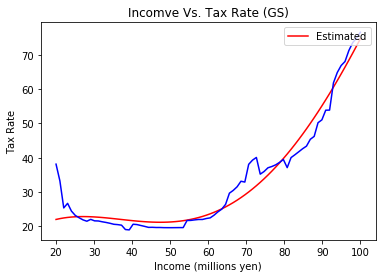

In [6]:
data = func(ages, a0_GMM, a1_GMM, a2_GMM, a3_GMM, a4_GMM)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

In [7]:
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, 23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, 21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, 20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, 20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, 19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, 19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, 21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, 22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, 29.65075992, 30.46944758, 31.51634777, 33.13353793, 32.89186997, 38.07083882, 39.2992811, 40.07987878, 35.19951571, 35.97943562, 37.05601334, 37.42979341, 37.91576867, 38.62775142, 39.4885405, 37.10609921, 40.03988031, 40.86564363, 41.73645892, 42.6208256, 43.37786072, 45.38166073, 46.22395387, 50.21419653, 51.05246704, 53.86896121, 53.90029708, 61.83586775, 64.87563699, 66.91207845, 68.07449767, 71.27919965, 73.57195873, 74.95045988, 76.6230815])
np.polynomial.chebyshev.chebfit(ages, data_moments, 4)

array([ 1.14432355e+02, -6.86389313e+00,  8.76791155e-02, -4.79244252e-04,
        1.01718461e-06])

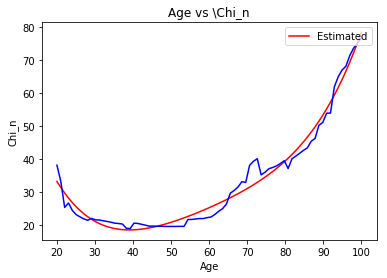

In [13]:
data = func(ages, 1.14432355e+02, -6.86389313e+00,  8.76791155e-02, -4.79244252e-04,
        1.01718461e-06)
plt.xlabel(r'Age')
plt.ylabel(r'Chi_n')
plt.title(r'Age vs \Chi_n')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

In [60]:
ages = np.linspace(20, 100, 79)
ages

array([ 20.        ,  21.02564103,  22.05128205,  23.07692308,
        24.1025641 ,  25.12820513,  26.15384615,  27.17948718,
        28.20512821,  29.23076923,  30.25641026,  31.28205128,
        32.30769231,  33.33333333,  34.35897436,  35.38461538,
        36.41025641,  37.43589744,  38.46153846,  39.48717949,
        40.51282051,  41.53846154,  42.56410256,  43.58974359,
        44.61538462,  45.64102564,  46.66666667,  47.69230769,
        48.71794872,  49.74358974,  50.76923077,  51.79487179,
        52.82051282,  53.84615385,  54.87179487,  55.8974359 ,
        56.92307692,  57.94871795,  58.97435897,  60.        ,
        61.02564103,  62.05128205,  63.07692308,  64.1025641 ,
        65.12820513,  66.15384615,  67.17948718,  68.20512821,
        69.23076923,  70.25641026,  71.28205128,  72.30769231,
        73.33333333,  74.35897436,  75.38461538,  76.41025641,
        77.43589744,  78.46153846,  79.48717949,  80.51282051,
        81.53846154,  82.56410256,  83.58974359,  84.61

beg [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55.
 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.]
end [ 65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100.]
data [ 20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.]


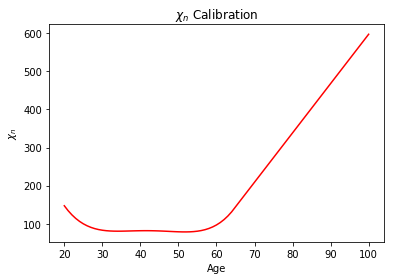

In [89]:
a0 = 1.15807470e+03 
a1 = -1.05805189e+02  
a2 = 1.92411660e+00 
a3 = -1.53364020e-02
a4 = 4.51819445e-05
ages_beg = np.linspace(20, 65, 46)
print('beg', ages_beg)
data_beg = func(ages_beg, a0, a1,a2,a3,a4)
ages_end = np.linspace(65, 100, 36)
print('end', ages_end)
data_end = (data_beg[-1] - data_beg[-2]) * (ages_end - 65) + data_beg[-1]
data = np.linspace(20, 100, 81)
ages = np.linspace(20, 100, 81)
print('data',data)
data[:46] = data_beg
data[45:] = data_end
plt.xlabel('Age')
plt.ylabel(r'$\chi_n$')
plt.title(r'$\chi_n$ Calibration')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.savefig("chi_n.png")

In [ ]:
slope = chi_n[80 // 2 + 5 - 1] - chi_n[p.S // 2 + 5 - 2]
    chi_n[80 // 2 + 5 - 1:] = (np.linspace(65, 100, 36) - 65) * slope + chi_n[p.S // 2 + 5 - 1]
    chi_n[chi_n < 0.5] = 0.5

In [21]:
ages

array([ 20.        ,  21.01265823,  22.02531646,  23.03797468,
        24.05063291,  25.06329114,  26.07594937,  27.08860759,
        28.10126582,  29.11392405,  30.12658228,  31.13924051,
        32.15189873,  33.16455696,  34.17721519,  35.18987342,
        36.20253165,  37.21518987,  38.2278481 ,  39.24050633,
        40.25316456,  41.26582278,  42.27848101,  43.29113924,
        44.30379747,  45.3164557 ,  46.32911392,  47.34177215,
        48.35443038,  49.36708861,  50.37974684,  51.39240506,
        52.40506329,  53.41772152,  54.43037975,  55.44303797,
        56.4556962 ,  57.46835443,  58.48101266,  59.49367089,
        60.50632911,  61.51898734,  62.53164557,  63.5443038 ,
        64.55696203,  65.56962025,  66.58227848,  67.59493671,
        68.60759494,  69.62025316,  70.63291139,  71.64556962,
        72.65822785,  73.67088608,  74.6835443 ,  75.69620253,
        76.70886076,  77.72151899,  78.73417722,  79.74683544,
        80.75949367,  81.7721519 ,  82.78481013,  83.79

### Experiments

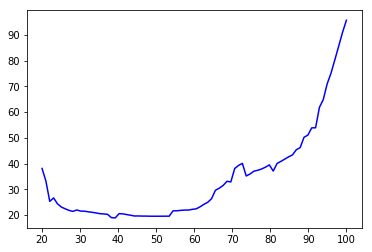

In [25]:
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, \
                         23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, \
                         21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, \
                         20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, \
                         20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, \
                         19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, \
                         19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, \
                         21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, \
                         22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, \
                         29.65075992, 30.46944758, 31.51634777, 33.13353793, 32.89186997, \
                         38.07083882, 39.2992811, 40.07987878, 35.19951571, 35.97943562, \
                         37.05601334, 37.42979341, 37.91576867, 38.62775142, 39.4885405, \
                         37.10609921, 40.03988031, 40.86564363, 41.73645892, 42.6208256, \
                         43.37786072, 45.38166073, 46.22395387, 50.21419653, 51.05246704, \
                         53.86896121, 53.90029708, 61.83586775, 64.87563699, 70.91207845, \
                         75.07449767, 80.27919965, 85.57195873, 90.95045988, 95.6230815])

# last 35 skyro
plt.plot(ages, data_moments, color = 'b', label = r'Data')

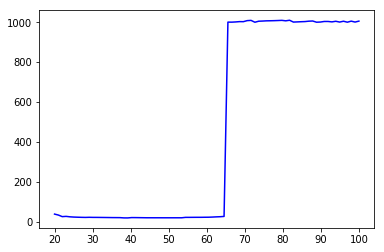

In [23]:
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, \
                         23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, \
                         21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, \
                         20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, \
                         20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, \
                         19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, \
                         19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, \
                         21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, \
                         22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, \
                         1000.65075992, 1000.46944758, 1001.51634777, 1003.13353793, 1002.89186997, \
                         1008.07083882, 1009.2992811, 1000.07987878, 1005.19951571, 1005.97943562, \
                         1007.05601334, 1007.42979341, 1007.91576867, 1008.62775142, 1009.4885405, \
                         1007.10609921, 1010.03988031, 1000.86564363, 1001.73645892, 1002.6208256, \
                         1003.37786072, 1005.38166073, 1006.22395387, 1000.21419653, 1001.05246704, \
                         1003.86896121, 1003.90029708, 1001.83586775, 1004.87563699, 1000.91207845, \
                         1005.07449767, 1000.27919965, 1005.57195873, 1000.95045988, 1005.6230815])

# last 35 skyro
plt.plot(ages, data_moments, color = 'b', label = r'Data')

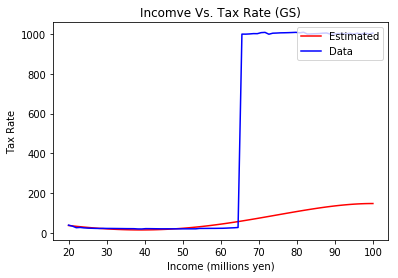

In [24]:
data = func(ages, 8.54802069e+01, -2.19154735e+00, -2.22817460e-02,  4.49993507e-04,
       -1.34197054e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')
plt.legend(loc='upper right')

In [25]:
numpy.polynomial.chebyshev.chebfit(ages, data_moments, 4)

NameError: name 'numpy' is not defined

In [ ]:
def func(x, *args):
    func = np.polynomial.chebyshev.chebval(x, [*args])
    return func

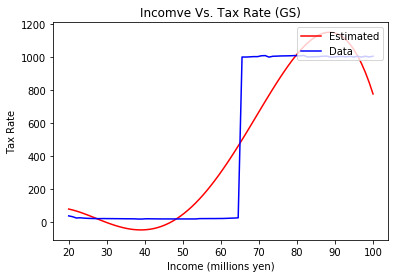

In [26]:
data = func(ages, -4.24292682e+02,  7.43693596e+01, -1.77576394e+00,  1.52068217e-02,
       -3.94351598e-05)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')
plt.legend(loc='upper right')

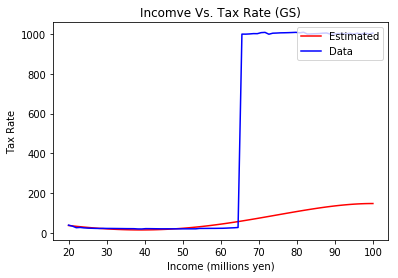

In [27]:
data = func(ages, 8.54802069e+01, -2.19154735e+00, -2.22817460e-02,  4.49993507e-04,
       -1.34197054e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')
plt.legend(loc='upper right')

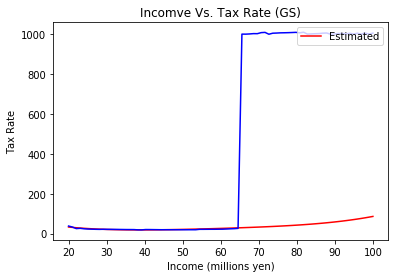

In [28]:
data = func(ages, 1.14432355e+02, -6.86389313e+00,  8.76791155e-02, -4.79244252e-04, 1.02718461e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

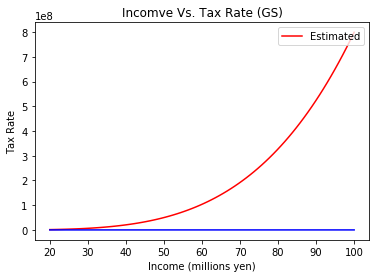

In [29]:
data = func(ages, 1.14432355e+02, -6.86389235e+00,  8.77593062e-02,  8.42993333e-03,
  9.99961326e-01)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

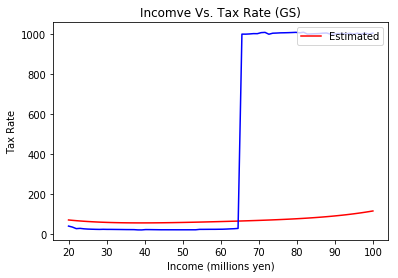

In [30]:
data = func(ages, 150, -6.86389313e+00,  8.76791155e-02, -4.79244252e-04,
  1.01718461e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'r', label = r'Estimated')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'b', label = r'Data')

#### 

### Graphing Labor Data

In [18]:
labor_hours = np.array([167, 165, 165, 165, 165, 166, 165, 165, 164, 166, 164])

labor_part_rate = np.array([0.69, 0.849, 0.849, 0.847, 0.847, 0.859, 0.859, 0.709, 0.709, 0.212, 0.212])

employ_rate = np.array([0.937, 0.954, 0.954, 0.966, 0.966, 0.97, 0.97, 0.968, 0.968, 0.978, 0.978])

labor_hours_adj = labor_hours * labor_part_rate * employ_rate

    # get fraction of time endowment worked (assume time
    # endowment is 24 hours minus required time to sleep 6.5 hours)
labor_moments = labor_hours_adj * 12 / (365 * 17.5)
labor_moments

array([0.20284088, 0.25106741, 0.25106741, 0.25362661, 0.25362661,
       0.25985036, 0.25828499, 0.21274329, 0.21145394, 0.06465962,
       0.06388059])

In [27]:
model_moments = np.array([0.32939923110797303, 0.3338015260217386, 0.35909105932009105, 0.37539615356388717, \
          0.38509142347626457, 0.38574642934840686, 0.3784334230218069, 0.36555275695791467, \
          0.3438113631065856, 0.3127118155207371, 0.233205594317522])

In [96]:
ages = np.linspace(20, 100, S)
age_bins = np.linspace(20, 75, 12)
age_bins[11] = 101
labels = np.linspace(20, 70, 11)
labels[-1] = 85
labels

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 85.])

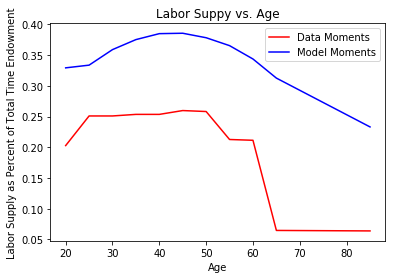

In [34]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')

In [35]:
model_moments = np.array([0.26280782645624473, 0.25125837817800445, 0.2609652904470937, 0.2686426215499922, 0.27647864956390755, 0.2812128890057656, 0.28178725148539163, 0.27858625382792546, 0.2681284198046509, 0.24964896148437535, 0.19968287319667855])

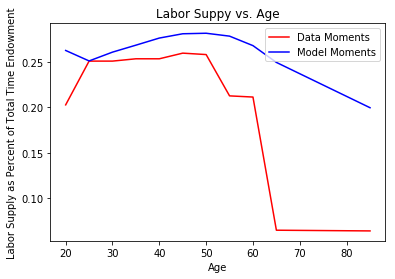

In [36]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
# with a0 = 150 

In [37]:
model_moments = np.array([0.2351009313419544, 0.22148634543117984, 0.22832760219801457, 0.2343418291969964, 0.24134617398563593, 0.24623442628143122, 0.24783390571384742, 0.24629264987773436, 0.23835484785650748, 0.22325467910767705, 0.18245643396777275])

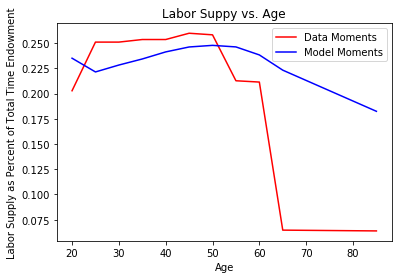

In [38]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
# with a0 = 180 
# DATA and MODEL DISTANCE:  0.04431202325065711

In [39]:
model_moments = np.array([0.24293766885599888, 0.22972622867533077, 0.23726101355506668, 0.2436888160280434, 0.2509287554268687, 0.25581759400738513, 0.2571973955675017, 0.2552678022128002, 0.24669926637042539, 0.23072097959614446, 0.18749598790394173])

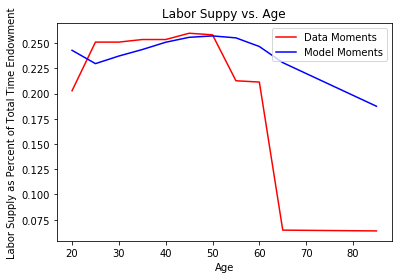

In [40]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
# with a0 = 170
# DATA and MODEL DISTANCE:  0.04828500988040618

In [41]:
model_moments = np.array([0.2852445232727669, 0.28102975026653915, 0.29542085849216393, 0.30410258248170685, 0.31066573495035904, 0.31303040789487074, 0.3112155697881269, 0.30624691517100866, 0.294285612584833, 0.2739947492461137, 0.21435808264734424])

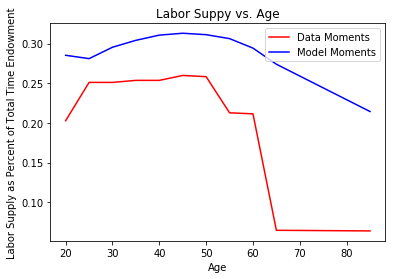

In [42]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
#0.1031550687611485

In [43]:
model_moments = np.array([0.2256835174832246, 0.21279864035215443, 0.22049193076146942, 0.22736515123018702, 0.2338898037650013, 0.2363744016795749, 0.23348292733397832, 0.22584993657640956, 0.21164041418319948, 0.1915072634137047, 0.1477425308637833])

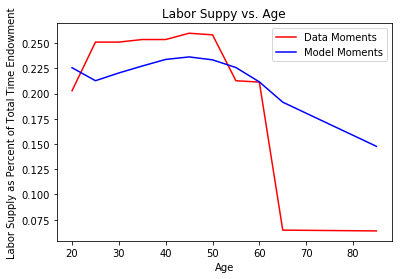

In [44]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
# DATA and MODEL DISTANCE:  0.028461583040964546

In [45]:
model_moments = np.array([0.2259028129867931, 0.21295422296198854, 0.22059442365687051, 0.22740392749112828, 0.23383671063046393, 0.2362033936361526, 0.23317386766416834, 0.2253931205453907, 0.21104539204176087, 0.19079652009071224, 0.1467245679348507])

In [46]:
labor_moments[9] = 0.1
labor_moments[10] = 0.1

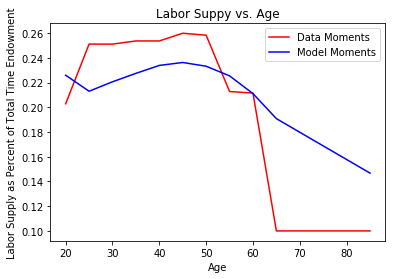

In [47]:
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')

In [48]:
0.21223295415283103, 0.22605666391498605, 0.23759651259573566, 0.2390886292449252, 0.239293008780936, 0.2414315202409734, 0.2424175534736756, 0.23407177537522705, 0.07254082727723188, 0.07121099508726003, 0.07091235356428197

(0.21223295415283103,
 0.22605666391498605,
 0.23759651259573566,
 0.2390886292449252,
 0.239293008780936,
 0.2414315202409734,
 0.2424175534736756,
 0.23407177537522705,
 0.07254082727723188,
 0.07121099508726003,
 0.07091235356428197)

In [57]:
model_moments = np.array([0.2169132615590483, 0.2351917517397763, 0.24854008756603815, 0.2498839104904591, 0.249771576920748, 0.25199796069733765, 0.25296651765087436, 0.24276464774752313, 0.0928902658729196, 0.09101360889975495, 0.09066486771174137])

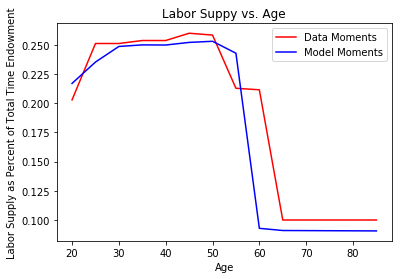

In [58]:
labor_moments[9] = 0.1
labor_moments[10] = 0.1
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')

In [63]:
model_moments = np.array([0.21528337529862704, 0.23380297817674245, 0.2474947296752713, 0.24892118088148557, 0.2488550485593559, 0.25115993661278674, 0.2521703226526169, 0.2417097369321606, 0.11991771529758082, 0.10308387132305903, 0.09966543301449807])

In [ ]:
model_moments = np.array([0.2527476508577838, 0.24995887360562544, 0.25675853915504016, 0.2584372005858786, 0.2570026558562935, 0.25430817720293497, 0.25142985711636595, 0.24870271403775623, 0.12897580384990331, 0.07198978130160402, 0.06769507938099484])

In [75]:
model_moments = np.array([0.3784357917019283, 0.39057340076567976, 0.41384331782900824, 0.4180370798798342, 0.40825601483611157, 0.3917327214841598, 0.37229245990891846, 0.3623316908366663, 0.1190709667197295, 0.0991512168512358, 0.09605096590979295])

In [77]:
model_moments = np.array([0.09887313218713244, 0.09787270234217284, 0.09813001187296647, 0.09864753188527468, 0.0989356154424808, 0.09908927491620331, 0.09916949103391941, 0.0991908486049511, 0.12142067177124163, 0.10784443152884825, 0.10417870377288223])

In [79]:
model_moments = np.array([0.10372154629692068, 0.10250049495873438, 0.10282380525185815, 0.10350533106674971, 0.10387455003527665, 0.10406380955278466, 0.10415621097517676, 0.10417387090886668, 0.1211622246986738, 0.10745911574096359, 0.10379287407401087])

In [81]:
model_moments = np.array([0.1039238036485731, 0.10353830594867455, 0.10316977307040259, 0.10385932388728049, 0.1042128284322146, 0.10438285806486296, 0.10446368967232435, 0.1044887218056549, 0.10258141578752267, 0.09517713409027438, 0.09313127598690546])

In [96]:
model_moments = np.array([0.21480694877558157, 0.24146120763129733, 0.2538177677789341, 0.2569083920538142, 0.26302009713617863, 0.27308892305166965, 0.2766592809280769, 0.2512470711046248, 0.16528592886288163, 0.15209005945880202, 0.13883906645374794])

In [99]:
model_moments = np.array([0.22563097126436543, 0.24979400652089634, 0.2588830331491015, 0.2601068241844309, 0.2638418761790711, 0.268500569059751, 0.26088533420912935, 0.22474888978253482, 0.14081188932679983, 0.11690000654760561, 0.09991892738948364])

In [120]:
model_moments = np.array([0.21109635790851605, 0.23681341827713015, 0.2514093867013933, 0.25562050688772775, 0.26012977440425206, 0.26792690732488633, 0.2766606681389972, 0.27070430184195343, 0.23629768670008755, 0.1457542686038759, 0.13520787754112237])

In [29]:
model_moments = np.array([0.22660059268404767, 0.24908816218085145, 0.2614332335551868, 0.26378091735915965, 0.2658326069862951, 0.2693585831321311, 0.2682248681247597, 0.24681103233266063, 0.19798764009928627, 0.11046206229558393, 0.08073902060003584])

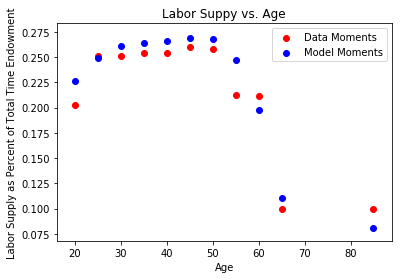

In [30]:
labor_moments[9] = 0.1
labor_moments[10] = 0.1
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.scatter(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.scatter(labels, model_moments, color = 'b', label = r'Model Moments')
plt.
plt.legend(loc='upper right')

In [94]:
model_moments = np.array([0.21109635790851605, 0.23681341827713015, 0.2514093867013933, 0.25562050688772775, 0.26012977440425206, 0.26792690732488633, 0.2766606681389972, 0.27070430184195343, 0.23629768670008755, 0.1457542686038759, 0.13520787754112237])

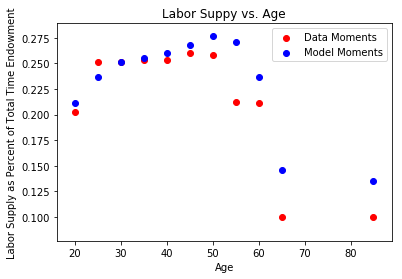

In [98]:
labor_moments[9] = 0.1
labor_moments[10] = 0.1
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.scatter(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.scatter(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')

In [92]:
model_moments = np.array([0.23364646547569223, 0.2567339667632728, 0.2680953131377466, 0.26960948893754155, 0.27241186647712806, 0.28028419476798155, 0.29366564707591447, 0.29796295257870714, 0.2751290859998026, 0.04497301215372038, 0.01870823455956176])

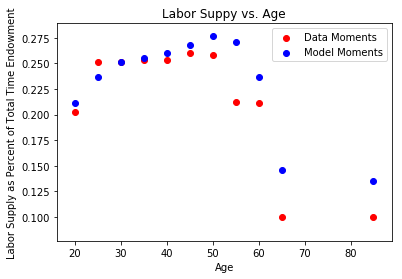

In [97]:
labor_moments[9] = 0.1
labor_moments[10] = 0.1
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.scatter(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.scatter(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')

In [99]:
model_moments = np.array([0.21092244724143888, 0.23663473960483364, 0.2512248460552426, 0.2554279329457508, 0.25988610741069157, 0.2674734351216116, 0.2756735811864669, 0.26881862807130374, 0.23334421444663225, 0.18809948673028212, 0.12602132474609165])

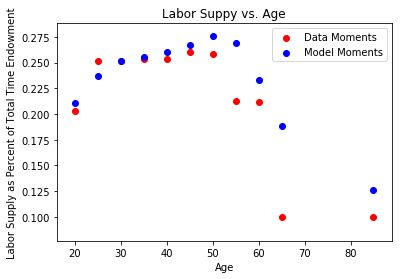

In [103]:
labor_moments[9] = 0.1
labor_moments[10] = 0.1
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.scatter(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.scatter(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')
plt.savefig("labor_moments.png")

### No extreme values for 65+

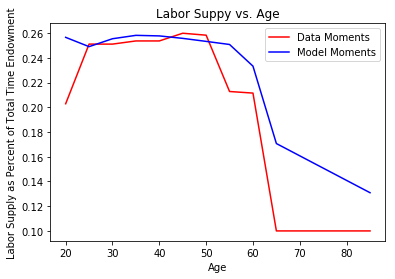

In [86]:
labor_moments[9] = 0.1
labor_moments[10] = 0.1
plt.xlabel('Age')
plt.ylabel('Labor Supply as Percent of Total Time Endowment')
plt.title('Labor Suppy vs. Age')
plt.plot(labels, labor_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')
plt.plot(labels, model_moments, color = 'b', label = r'Model Moments')
plt.legend(loc='upper right')

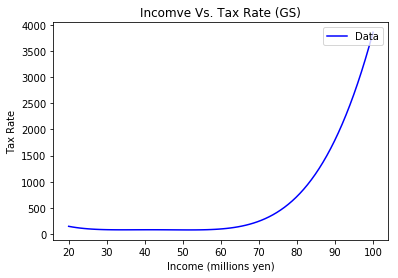

In [69]:

a0 = 1.15807470e+03#5.19144310e+02
a1 = -1.05805189e+02#-4.70245283e+01
a2 = 1.92411660e+00#8.55162933e-01
a3 = -1.53364020e-02#-6.81617866e-03
a4 = 4.51819445e-05
data = func(ages, a0,a1,a2,a3,a4)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'b', label = r'Data')
plt.legend(loc='upper right')

In [70]:
data_moments = np.array([38.12000874, 33.22762421, 25.3484224, 26.67954008, 24.41097278, \
                         23.15059004, 22.46771332, 21.85495452, 21.46242013, 22.00364263, \
                         21.57322063, 21.53371545, 21.29828515, 21.10144524, 20.8617942, \
                         20.57282, 20.47473172, 20.31111347, 19.04137299, 18.92616951, \
                         20.58517969, 20.48761429, 20.21744847, 19.9577682, 19.66931057, \
                         19.6878927, 19.63107201, 19.63390543, 19.5901486, 19.58143606, \
                         19.58005578, 19.59073213, 19.60190899, 19.60001831, 21.67763741, \
                         21.70451784, 21.85430468, 21.97291208, 21.97017228, 22.25518398, \
                         22.43969757, 23.21870602, 24.18334822, 24.97772026, 26.37663164, \
                         29.65075992, 30.46944758, 31.51634777, 33.13353793, 32.89186997, \
                         38.07083882, 39.2992811, 40.07987878, 35.19951571, 35.97943562, \
                         37.05601334, 37.42979341, 37.91576867, 38.62775142, 39.4885405, \
                         37.10609921, 40.03988031, 40.86564363, 41.73645892, 42.6208256, \
                         43.37786072, 45.38166073, 46.22395387, 50.21419653, 51.05246704, \
                         53.86896121, 53.90029708, 61.83586775, 64.87563699, 70.91207845, \
                         75.07449767, 80.27919965, 85.57195873, 90.95045988, 95.6230815])
np.polynomial.chebyshev.chebfit(ages, data_moments, 4)

array([ 1.51607381e+02, -1.03143105e+01,  1.42760562e-01, -8.41089078e-04,
        1.85173227e-06])

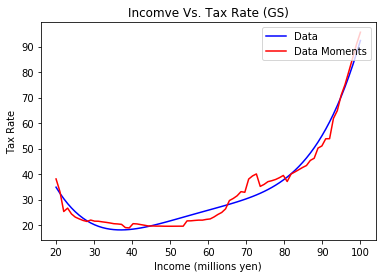

In [74]:
data = func(ages, 1.51607381e+02, -1.03143105e+01,  1.42760562e-01, -8.41089078e-04,
        1.85173227e-06)
plt.xlabel('Income (millions yen)')
plt.ylabel('Tax Rate')
plt.title('Incomve Vs. Tax Rate (GS)')
plt.plot(ages, data, color = 'b', label = r'Data')
plt.legend(loc='upper right')
plt.plot(ages, data_moments, color = 'r', label = r'Data Moments')
plt.legend(loc='upper right')

## SS Chi_n

In [47]:
data = np.array([147.18375544,   134.02345201,   122.82492284,   113.39425896,
         105.54704226,    99.10834551,    93.9127323 ,    89.80425711,
          86.63646527,    84.27239295,    82.58456722,    81.45500597,
          80.77521795,    80.4462028 ,    80.37845099,    80.49194386,
          80.71615359,    80.99004326,    81.26206676,    81.49016887,
          81.64178521,    81.69384228,    81.63275742,    81.45443884,
          81.16428559,    80.7771876 ,    80.31752565,    79.81917138,
          79.32548727,    78.8893267 ,    78.57303387,    78.44844385,
          78.59688257,    79.10916682,    80.08560426,    81.63599338,
          83.87962354,    86.94527498,    90.97121877,    96.10521685,
         102.50452201,   110.33587793,   119.7755191 ,   131.0091709 ,
         144.23204957,  1644.23204957,  3144.23204957,  4644.23204957,
        6144.23204957,  7644.23204957,  9144.23204957, 10644.23204957,
       12144.23204957, 13644.23204957, 15144.23204957, 16644.23204957,
       18144.23204957, 19644.23204957, 21144.23204957, 22644.23204957,
       24144.23204957, 25644.23204957, 27144.23204957, 28644.23204957,
       30144.23204957, 31644.23204957, 33144.23204957, 34644.23204957,
       36144.23204957, 37644.23204957, 39144.23204957, 40644.23204957,
       42144.23204957, 43644.23204957, 45144.23204957, 46644.23204957,
       48144.23204957, 49644.23204957, 51144.23204957, 52644.23204957])

In [53]:
labels = np.linspace(21, 100, 80)
print(labels)

[ 21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.
  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.
  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.
  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.
  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.]


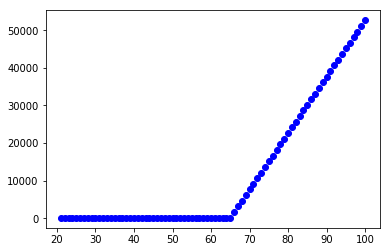

In [56]:
labels = np.linspace(21, 100, 80)
plt.scatter(labels, data, color = 'b', label = r'Data')